In [1]:
from matplotlib import pyplot as plt
from matplotlib import colors

import numpy as np
import pandas as pd
import os,glob
import logging
from helper import getModelDict


c_light = 3e8

FORMAT = '%(levelname)s: %(message)s at %(asctime)s'
logging.basicConfig(format=FORMAT,datefmt='%m/%d/%Y %I:%M:%S %p')
logger = logging.getLogger()

In [2]:
defaultPars = {'figure.figsize': (5, 4),
               'lines.markersize' : 4,
               'axes.titlesize' : 13,
               'font.size' : 13,
               'axes.labelsize' : 16,
               'xtick.labelsize' : 13,
               'ytick.labelsize' : 13,
               'legend.fontsize' : 10,
               "text.usetex": True,
               "font.family": "sans-serif",
               "font.sans-serif": ["Helvetica"],
               'font.family':'Times New Roman', 
               'font.serif':'Times New Roman',
               "savefig.dpi" : 300,
               'contour.linewidth' : 2.0,
               'lines.linewidth' : 2.0,
               'axes.grid' : True,
               'grid.linewidth' : 0.5,
               'grid.color' : 'lightgray',
               'axes.axisbelow' : True
               }
plt.rcParams.update(defaultPars)

### Banner files to be read

In [3]:
files = list(glob.glob('./lifetime_scan/Events/run_*/*banner.txt'))

modelDict = {}
for f in files:
    if not os.path.isfile(f):
        print(f'File {f} not found. Skipping.')
    else:
        modelDict[f] = getModelDict(f,verbose=False)


In [4]:
df = pd.DataFrame.from_dict(modelDict.values()).round({'m0' : 1, 'm1'  : 1})

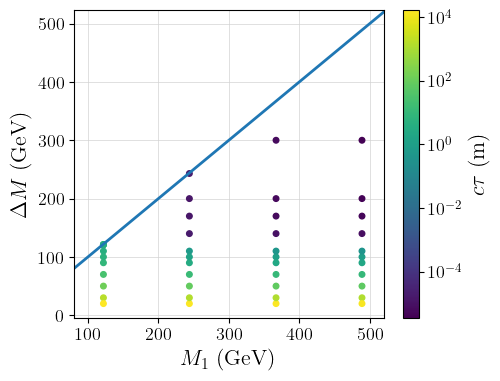

In [5]:
plt.scatter(df['m1'],df['m1']-df['m0'],c=df['tau']*c_light,norm=colors.LogNorm())
plt.colorbar(label=r'$c \tau$ (m)')
plt.xlabel(r'$M_1$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
plt.axline((100.,100.),(500.,500.))
plt.show()

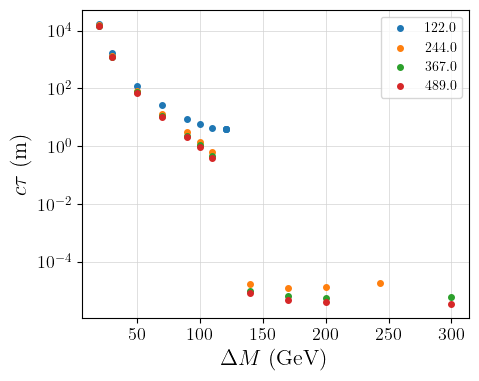

In [23]:
for m1,m1_index in df.groupby('m1').groups.items():
    dfFilter = df.iloc[m1_index]
    plt.scatter(dfFilter['m1']-dfFilter['m0'],dfFilter['tau']*c_light,label=f'{m1:1.1f}')

plt.ylabel(r'$c \tau$ (m)')
plt.xlabel(r'$\Delta M$ (GeV)')
plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
def getLambdaFor(df,m1,m0,ctau_m):
    filterData = df[(df['m1'] == np.round(m1,1)) & (df['m0'] == np.round(m0,1))]
    if len(filterData) == 0:
        print(f'Point m1 = {m1} and m0 = {m0} not in data')
        return None
    ctau0 = filterData['tau'].iloc[0]*c_light
    lamb = filterData['lambdauv'].iloc[0]
    newlamb = np.sqrt(ctau_m/ctau0)*lamb

    return newlamb




In [ ]:
print(getLambdaFor(df=df,m1=489.0,m0=189.0,ctau_m=3.0))

In [ ]:
import itertools

m1List = np.arange(100.,1000.,10.)
dmList = np.arange(1.,500.,5.)
m1_dm = [(m1,dm) for m1,dm in itertools.product(m1List,dmList)]
for 